In [37]:
from datetime import date
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame

In [38]:
dates = []
value_counts_all = []
for file in sorted(Path(".").glob("*.csv")):
    value_counts = pandas.read_csv(file)["vendor"].value_counts()
    value_counts_all.append(value_counts)
    dates.append(date.fromisoformat(file.name[len("result-") + 1 : -len(".csv")]))

In [39]:
df = DataFrame(value_counts_all, index=dates)

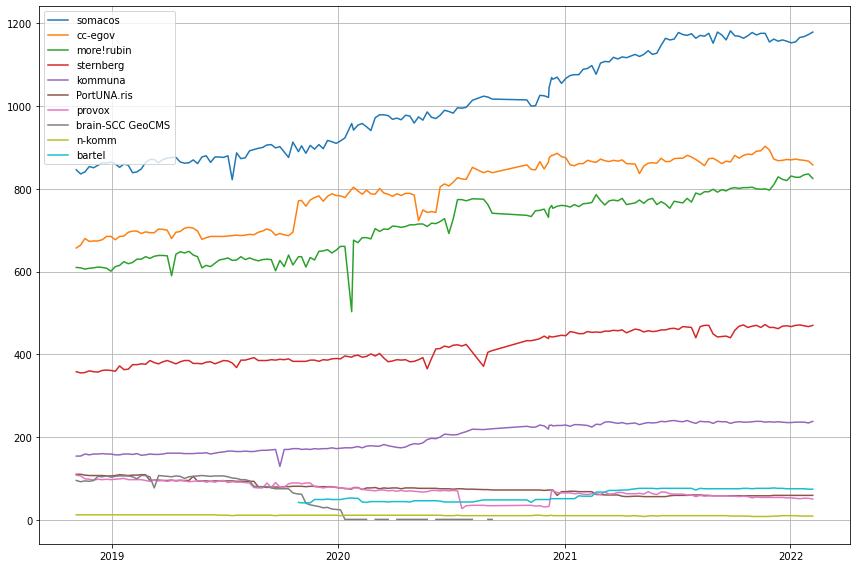

In [40]:
plt.figure(figsize=(12,8))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.legend()
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.tight_layout()
plt.savefig("vendors-over-time.png")
plt.savefig("vendors-over-time.svg")
plt.show()